# Statistical Plotting Tutorial
## Essential Functions for Data Visualization

This notebook provides hands-on examples of essential statistical plotting functions in Python, corresponding to the lecture slides.

## 1. Setup and Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2a. Generate Sample Data (9 points total)

### Your Task: Create a Clinical Trial Dataset

You are a biostatistician working on a clinical trial. You need to generate synthetic data to test your plotting functions before receiving the real data.

### Study Design:
- **3 experimental groups**: A, B, and C (different patient populations)
- **2 treatments per group**: Control and Drug
- **Sample size**: 50 patients per treatment per group (300 total patients)

### Data Requirements:
Create a DataFrame with these columns:
- `Group`: 'A', 'B', or 'C' 
- `Value`: The measured outcome (continuous variable)
- `Treatment`: 'Control' or 'Drug'
- `Subject_ID`: Unique identifier (1 to 300)

### Expected Outcomes (for realistic data): (1.5 points each)
- **Group A Control**: Mean $\approx$ 100, Standard deviation $\approx$ 15
- **Group A Drug**: Mean $\approx$ 105, Standard deviation $\approx$ 15  
- **Group B Control**: Mean $\approx$ 95, Standard deviation $\approx$ 20
- **Group B Drug**: Mean $\approx$ 115, Standard deviation $\approx$ 20
- **Group C Control**: Mean $\approx$ 98, Standard deviation $\approx$ 12
- **Group C Drug**: Mean $\approx$ 108, Standard deviation $\approx$ 12

#### Hint: Use np.random.normal(mean, std, n_samples)

## 2b. Combine all data into a single DataFrame (6 points)
#### Hint: You'll need to create matching labels for each data array

```python
# Combine all data into a single DataFrame
# Hint: You'll need to create matching labels for each data array

df = pd.DataFrame({
    'Group': # Create labels: 50 'A's, 50 'A's, 50 'B's, 50 'B's, etc.
    'Value': # Concatenate all your data arrays
    'Treatment': # Create labels: 50 'Control', 50 'Drug', repeated 3 times
    'Subject_ID': # Create unique IDs from 1 to 300
})



In [ ]:
# TO DO: Generate sample data for different groups

# THIS RN IS VERY INEFFICIENT FOR THE COMPUTER LUMFAO, BUT IDK WHAT METHODS I'M ALLOWED TO USE..
# AND THEY DON'T CHECK FOR EFFICIENCY DO THEY

groups = ['A']*100 + ['B']*100 + ['C']*100  # 6 groups, each with 50 samples
treatments = ['Control']*50 + ['Drug']*50 + ['Control']*50 + ['Drug']*50 + ['Control']*50 + ['Drug']*50  # 2 treatments, each with 150 samples
subject_ids = range(1, 301)  # unique identifier for 300 subjects

values = np.concatenate([
    np.random.normal(100, 15, 50),  # group A control
    np.random.normal(105, 15, 50),  # group A drug
    np.random.normal(95, 20, 50),  # group B control
    np.random.normal(115, 20, 50),  # group B drug
    np.random.normal(98, 12, 50),  # group C control
    np.random.normal(108, 12, 50),  # group C drug
])

# TO DO Create a comprehensive DataFrame (Use above template)
df = pd.DataFrame({
    'Group': groups,
    'Value': values,
    'Treatment': treatments,
    'Subject_ID': subject_ids
})

print(f"DataFrame created with shape: {df.shape}")
print("\nFirst few rows:")
df.head(10)

DataFrame created with shape: (300, 4)

First few rows:


,Group,Value,Treatment,Subject_ID
0,A,111.354829,Control,1
1,A,86.167520,Control,2
2,A,113.044089,Control,3
3,A,120.334568,Control,4
4,A,106.201524,Control,5
5,A,128.151937,Control,6
6,A,88.393162,Control,7
7,A,81.330179,Control,8
8,A,73.319196,Control,9
9,A,122.440665,Control,10


In [5]:
# Quick data summary
print("Data Summary:")
print(df.groupby('Group')['Value'].describe())

Data Summary:
       count        mean        std        min        25%         50%  \
Group                                                                   
A      100.0  102.861408  16.185601  59.546700  93.530775  101.518020   
B      100.0  104.876789  23.257334  53.361412  89.172050  103.073889   
C      100.0  105.743789  12.832355  80.173276  95.676189  102.968249   

              75%         max  
Group                          
A      113.982148  143.600397  
B      120.974672  167.647641  
C      115.382954  138.323189  


## 3. Box Plots - `sns.boxplot()` 

Box plots show the distribution's quartiles, median, and outliers.

### Your Tasks:

#### Task 3.1: Create Basic Box Plots (12 points)
Create two side-by-side box plots to compare different ways of visualizing the same data.

**To-Do List:**
- [ ] Create a figure with size 10×6 inches
- [ ] Set up 2 subplots in 1 row, 2 columns  
- [ ] **Left subplot**: Basic box plot showing Groups vs Values
- [ ] **Right subplot**: Box plot with Treatment as grouping variable (hue)
- [ ] Add appropriate titles and y-axis labels
- [ ] Use `plt.tight_layout()` to prevent overlap
- [ ] Display the plots

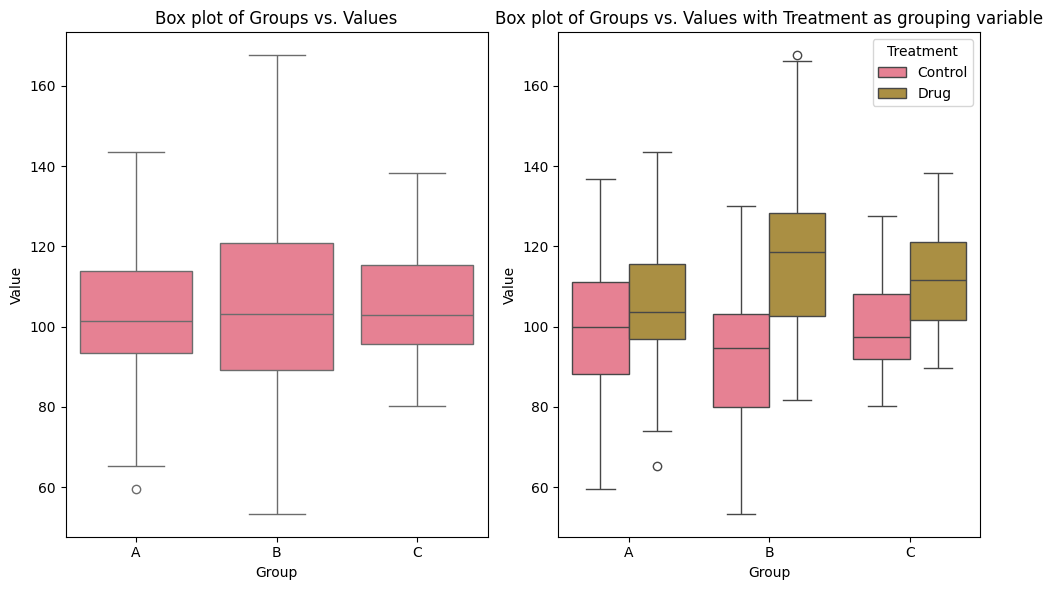

Group
A    101.518020
B    103.073889
C    102.968249
Name: Value, dtype: float64


In [18]:
# TO DO Basic box plot

plt.figure(figsize=(10, 6))

# left subplot
plt.subplot(1, 2, 1)
plt.title('Box plot of Groups vs. Values')
sns.boxplot(data=df, x='Group', y='Value')

# right subplot
plt.subplot(1, 2, 2)
plt.title('Box plot of Groups vs. Values with Treatment as grouping variable')
sns.boxplot(data=df, x='Group', y='Value', hue='Treatment')

plt.tight_layout()
plt.show()


# get the median values for each group
medians = df.groupby('Group')['Value'].median()
print(medians)

## Data Interpretation Questions: (4 points)

1. **Group Comparison** (2 points): 

   **- Which group (A, B, or C) has the highest median value?** B

   **- Which group shows the most variability?** B

2. **Treatment Effects** (2 points):

   **- In the right plot, do you see consistent treatment effects across all groups?** No

   **- Which group shows the largest difference between Control and Drug treatments?** B

3. **Outliers** (2 points):

   **- Do you see any outlier points (dots beyond the whiskers)?** Yes

   **- Which group/treatment combination has the most outliers?** A and B each have 1 outlier.

4. **Plot Comparison** (2 points):

   **- What additional information does the grouped plot (right) provide that the basic plot (left) doesn't show?** The right plot separates the values (continuous outcome) between patients from the control group and those from the drug treated group.
   
   **- When would you choose one visualization over the other?** You would choose the grouped plot (right) when you would like to see the difference between values from patients in the control and treated group. Specifically, it could show you how the drug could affect/correlate with the experimental values/outcomes.

## 4. Violin Plots - `sns.violinplot()` 

Violin plots combine box plots with kernel density estimation to show the full distribution shape.


### Your Tasks:

#### Task 4.1: Create Three Types of Violin Plots (9 points)
Compare different violin plot variations to understand their strengths.

**To-Do List:**
- [ ] Create a figure with size 15×5 inches (wider for 3 subplots)
- [ ] Set up 3 subplots in 1 row, 3 columns
- [ ] **Left subplot**: Basic violin plot (Groups vs Values)
- [ ] **Middle subplot**: Violin plot with inner quartiles displayed
- [ ] **Right subplot**: Split violin plot showing Treatment differences
- [ ] Add descriptive titles to each subplot
- [ ] Use `plt.tight_layout()` and display the plots


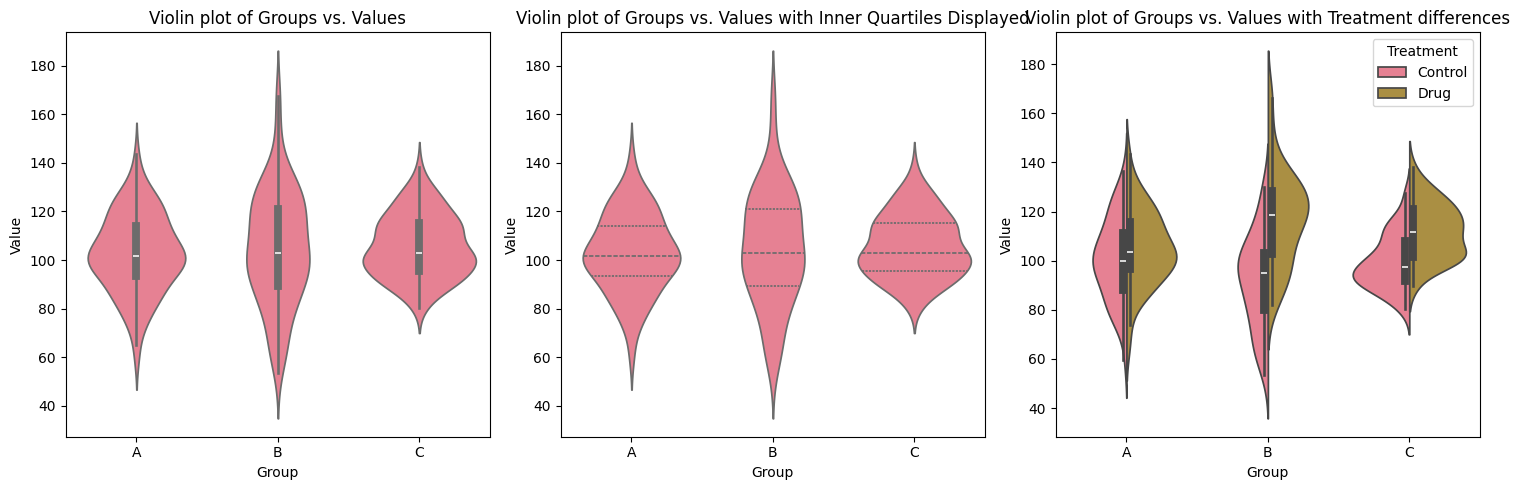

In [ ]:
#TO DO basic violin plot

plt.figure(figsize=(15, 5))

# set up 3 subplots
# left subplot
plt.subplot(1, 3, 1)
plt.title('Violin plot of Groups vs. Values')
sns.violinplot(data=df, x='Group', y='Value')

# middle subplot
plt.subplot(1, 3, 2)
plt.title('Violin plot of Groups vs. Values with Inner Quartiles Displayed')
sns.violinplot(data=df, x='Group', y='Value', inner='quartile')

# right subplot
plt.subplot(1, 3, 3)
plt.title('Violin plot of Groups vs. Values with Treatment differences')
sns.violinplot(data=df, x='Group', y='Value', hue='Treatment', split=True)

plt.tight_layout()
plt.show()

#### Task 4.2: Analyze Your Results ( 4 points total)

After running your code, answer these questions:

** Data Interpretation Questions:**

1. **Distribution Shape**:
   - Which group has the most symmetrical distribution? A
   - Do any groups show multiple peaks (bimodal distribution)? C

2. **Comparing Plot Types**:
   - What can you see in the violin plots that you couldn't see in the box plots? The width of the violin at different points shows you where the data is concentrated or how common values. You can also identify whether the distribution is unimodal, biomodal, or multimodal. A box plot only shows the summary statistics like median, quartiles, whiskers, and outliers.
   - Which plot type (left vs middle) makes it easier to identify the median?

3. **Split Violin Analysis**:
   - In the right plot, which treatment shows wider distributions? B
   - Can you see clear separation between Control and Drug treatments? Yes

4. **Data Density**:
   - Where is most of the data concentrated in each group (top, middle, or bottom of the value range)? Middle
   - Which group has the most consistent data (narrowest violin shape)? B

## 5. Strip Plots (Dot Plots) - `sns.stripplot()`

Strip plots show individual data points, useful for smaller datasets.

### Your Tasks:

#### Task 5.1: Create Three Types of Dot Plots (8 points)

**To-Do List:**
- [ ] Create 3 subplots in one row (figure size 15×5)
- [ ] **Left**: Basic strip plot with `jitter=True` and `alpha=0.6` , do not separte control and drug treatments
- [ ] **Middle**: Grouped strip plot using `dodge=True`, separate control and drug tratments
- [ ] **Right**: Swarm plot using a smaller dataset (sample 150 rows), do not separte control and drug treatments
- [ ] Add appropriate titles and use `tight_layout()`

**Hints:**
- Use `sns.stripplot()` for the first two plots
- Use `sns.swarmplot()` for the third plot
- Create smaller dataset with: `df_small = df.sample(n=150, random_state=42)`


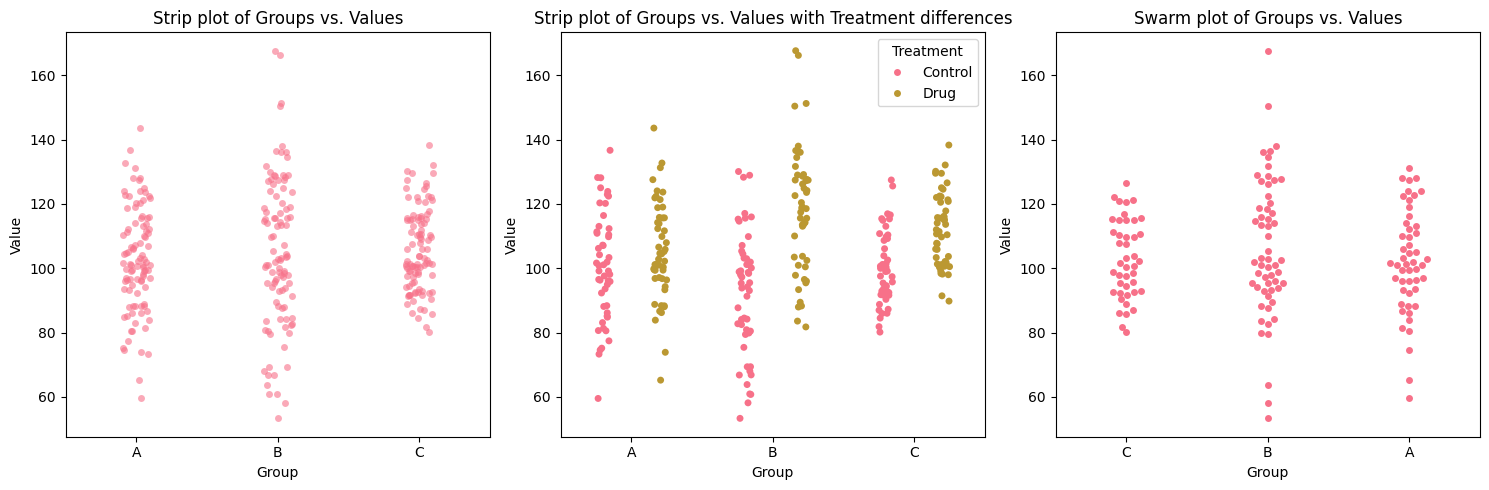

In [22]:
# TO DO Dot plots

plt.figure(figsize=(15, 5))

# create 3 subplots
# left subplot
plt.subplot(1, 3, 1)
plt.title('Strip plot of Groups vs. Values')
sns.stripplot(data=df, x='Group', y='Value', jitter=True, alpha=0.6)

# middle subplot
plt.subplot(1, 3, 2)
plt.title('Strip plot of Groups vs. Values with Treatment differences')
sns.stripplot(data=df, x='Group', y='Value', hue='Treatment', dodge=True)

# right subplot
plt.subplot(1, 3, 3)
df_small = df.sample(n=150, random_state=42)  # use a smaller dataset for swarm plot
plt.title('Swarm plot of Groups vs. Values')
sns.swarmplot(data=df_small, x='Group', y='Value')


plt.tight_layout()
plt.show()

#### Task 5.2: Analyze Your Results (4 points total)

** Data Interpretation Questions:**

1. **Individual Points**:
   
   **- Can you identify specific outlier values that were hidden in box/violin plots?** Yes

   **- Which group has the most scattered individual points?** B

2. **Plot Comparison**:

   **- What's the difference between strip plots and swarm plots?** A strip plot places all individual data points along a single axis, but on a swarm plot, there is a non-overlapping arrangement of the points to preserve the distribution shape.

   **- Which plot type makes it easier to see data density?** Swarm plot

3. **Grouping Effects**:

   **- In the middle plot, can you see clear separation between Control and Drug treatments?** Yes

   **- Which treatment group appears to have more consistent values?** A

4. **Sample Size Impact**:

   **- Why did we use a smaller dataset for the swarm plot?** Swarm plots reposition every point to avoid overlap, which generally works better on datasets that are modest in size. Large datasets could cause swarm plots to become too crowded and messy.
   
   **- How does showing individual points change your interpretation compared to summary plots?** It can reveal the median, spread, skewness, and general distribution shape. You can see every single observation and easily identify clustering, unusual gaps, or repeated values.


## 6. Q-Q Plots - `stats.probplot()` 

Quantile-Quantile plots help assess if data follows a specific distribution (usually normal).

### Your Tasks:

#### Task 6.1: Create Q-Q Plots for Each Group (15 points)

**To-Do List:**
- [ ] Create 3 subplots in one row (figure size 15×5)
- [ ] Loop through groups A, B, and C
- [ ] For each group, filter the data and create a Q-Q plot using `stats.probplot()`
- [ ] Test against normal distribution (`dist="norm"`)
- [ ] Add titles showing which group and add grid with `alpha=0.3`
- [ ] Use `tight_layout()`

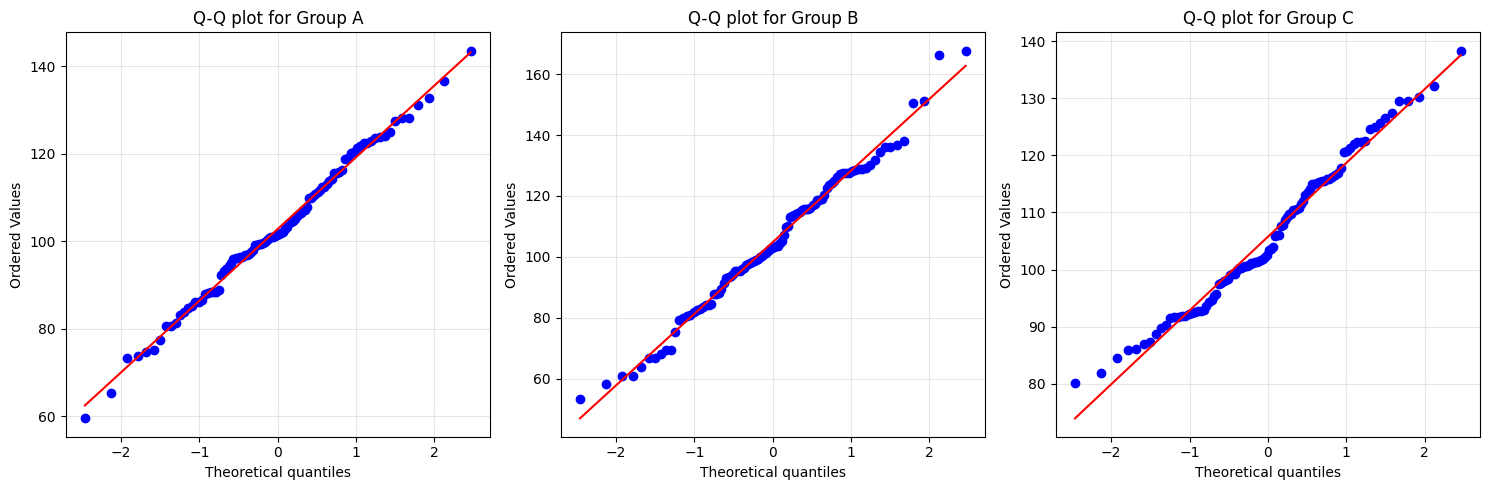

In [27]:
# TO DO complete Q-Q plot

plt.figure(figsize=(15, 5))

# left subplot
plt.subplot(1, 3, 1)
stats.probplot(df[df['Group'] == 'A']['Value'], dist="norm", plot=plt)
plt.title('Q-Q plot for Group A')
plt.grid(alpha=0.3)

# middle subplot
plt.subplot(1, 3, 2)
stats.probplot(df[df['Group'] == 'B']['Value'], dist="norm", plot=plt)
plt.title('Q-Q plot for Group B')
plt.grid(alpha=0.3)

# right subplot
plt.subplot(1, 3, 3)
stats.probplot(df[df['Group'] == 'C']['Value'], dist="norm", plot=plt)
plt.title('Q-Q plot for Group C')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

#### Task 6.2: Analyze Your Results (3 points total)

** Data Interpretation Questions:**

1. **Normality Assessment**:

   **- Which group's data appears most normally distributed (straightest line)?** A

   **- Do any groups show clear deviations from the diagonal line?** A couple of deviating points on the lower end of values for Group C as well as both the extreme values (low and high) for Group B.

2. **Pattern Recognition**:

   **- Do you see any S-shaped curves indicating skewness?** Yes, C

   **- Are there points that deviate strongly at the ends (heavy tails)?** Yes, left end of Q-Q plot for Group C and both ends of Q-Q plot for Group B.

3. **Group Comparison**:
   **- Which group has the best fit to normal distribution?** A

   **- Do all groups show similar patterns or are there differences?** Group A fits the normal distribution pretty well. Group B is concave up indicating that it is right skewed. Group C is and S-shape which indicates...????????????????????????


## 7. Histograms - `sns.histplot()` 

Histograms show the frequency distribution of your data.

### Your Tasks:

#### Task 7.1: Create Three Types of Histograms (13 points)

**To-Do List:**
- [ ] Create 3 subplots in one row (figure size 15×5)
- [ ] **Left**: Basic histogram with 30 bins
- [ ] **Middle**: Histogram with KDE overlay (`kde=True`)
- [ ] **Right**: Multiple group histograms with `alpha=0.6`, and 25 bins
- [ ] Add descriptive titles and use `tight_layout()`

**Hints:**
- Use `sns.histplot()` as base function
- Add parameters: `bins=`, `kde=`, `hue=`, `alpha=`


Bin edges: [ 53.36141184  57.17095282  60.98049381  64.79003479  68.59957577
  72.40911675  76.21865773  80.02819872  83.8377397   87.64728068
  91.45682166  95.26636264  99.07590362 102.88544461 106.69498559
 110.50452657 114.31406755 118.12360853 121.93314951 125.7426905
 129.55223148 133.36177246 137.17131344 140.98085442 144.79039541
 148.59993639 152.40947737 156.21901835 160.02855933 163.83810031
 167.6476413 ]


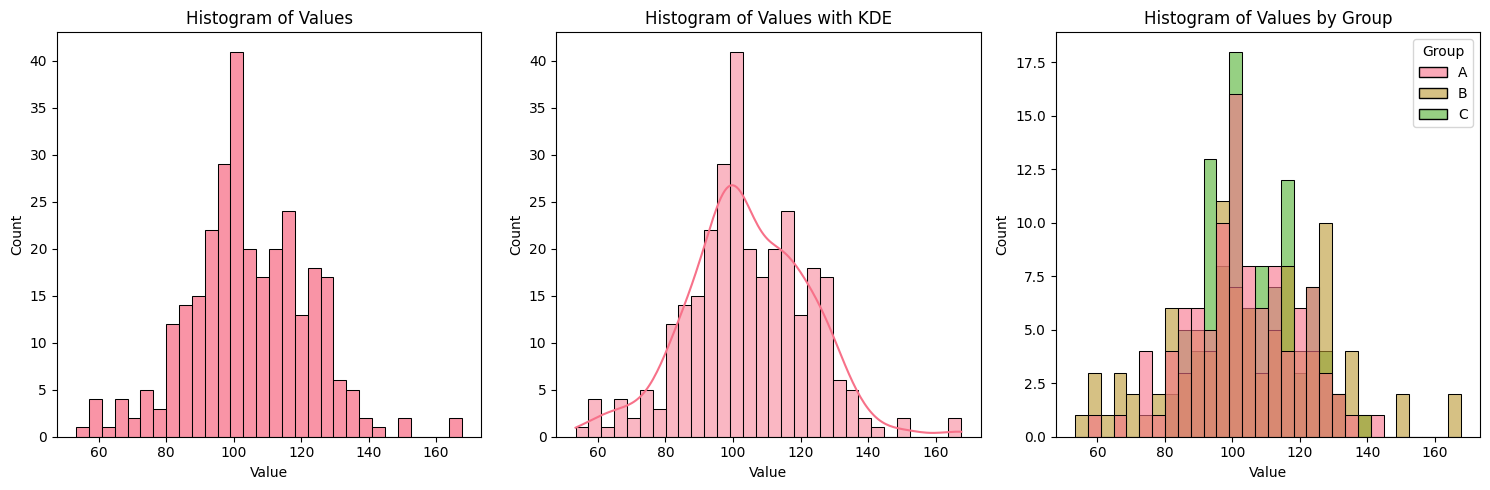

In [31]:
# TO DO Define figure

plt.figure(figsize=(15, 5))

# Basic histogram
plt.subplot(1, 3, 1)
plt.title('Histogram of Values')
sns.histplot(data=df, x='Value', bins=30)

counts, bin_edges = np.histogram(df['Value'], bins=30)
print("Bin edges:", bin_edges)

# Histogram with KDE
plt.subplot(1, 3, 2)
plt.title('Histogram of Values with KDE')
sns.histplot(data=df, x='Value', bins=30, kde=True)

# Multiple distributions
plt.subplot(1, 3, 3)
plt.title('Histogram of Values by Group')
sns.histplot(data=df, x='Value', hue='Group', bins=30, alpha=0.6)


plt.tight_layout()
plt.show()

#### Task 7.2: Analyze Your Results (4 points total)

** Data Interpretation Questions:**

1. **Distribution Shape**:
   
   **- Is the overall distribution (left plot) roughly normal, skewed, or multimodal?** Normal

   **- Where is the peak of the distribution located?** For the bin with range 99.076 to 102.885.

2. **KDE vs Bars**:

   **- How does the KDE line (middle plot) help interpret the data?** It allows us to see the overall shape of the distribution, in this case a bell-shaped curve, as well as spot any peaks at a glance.

   **- Does the smooth curve reveal patterns the bars might hide?** Histograms depend on bin size, so a slightly different bin width or starting edge could make the distribution look very different. the KDE can help us identify if the data is unimodal, bimodal, multimodal, or skewed.

3. **Group Differences**:

   **- In the right plot, which group has the highest peak?** ???????????????????????????????????????????

   **- Do the groups overlap significantly or are they well-separated?** From the slight transparency of the plot, we can rocognize that the groups overlap a significantly amount.

4. **Data Patterns**:

   **- Can you identify which groups contribute to different parts of the overall distribution?** ????????????????????????

   **- Are there any gaps or unusual patterns in the data?** ?????????????????????????????????????????

## 8. Advanced Customization 

Make your plots publication-ready with custom styling.

### Why Customize Your Plots?
Professional plots require:
- **Clear titles and labels** with appropriate font sizes
- **Custom color schemes** that are accessible and meaningful
- **Proper legends** that explain grouping variables
- **Grid lines** for easier value reading
- **Sample size information** for transparency

### Your Tasks:

#### Task 8.1: Create a Publication-Ready Plot (9 points)

**To-Do List:**
- [ ] Create a box plot with custom color palette (`['lightblue', 'lightcoral']`)
- [ ] Add a descriptive title with `fontsize=16`, `fontweight='bold'`, `pad=20`
- [ ] Set informative axis labels with `fontsize=12`
- [ ] Customize legend with title and appropriate font sizes
- [ ] Add grid with `alpha=0.3` and set white background
- [ ] Use `tight_layout()` for professional spacing

**Hints:**
- Store the plot in a variable: `ax = sns.boxplot(...)`
- Use `ax.set_title()`, `ax.set_xlabel()`, `ax.set_ylabel()` for labels
- Use `ax.legend()` for legend customization
- Use `ax.grid()` and `ax.set_facecolor()` for styling


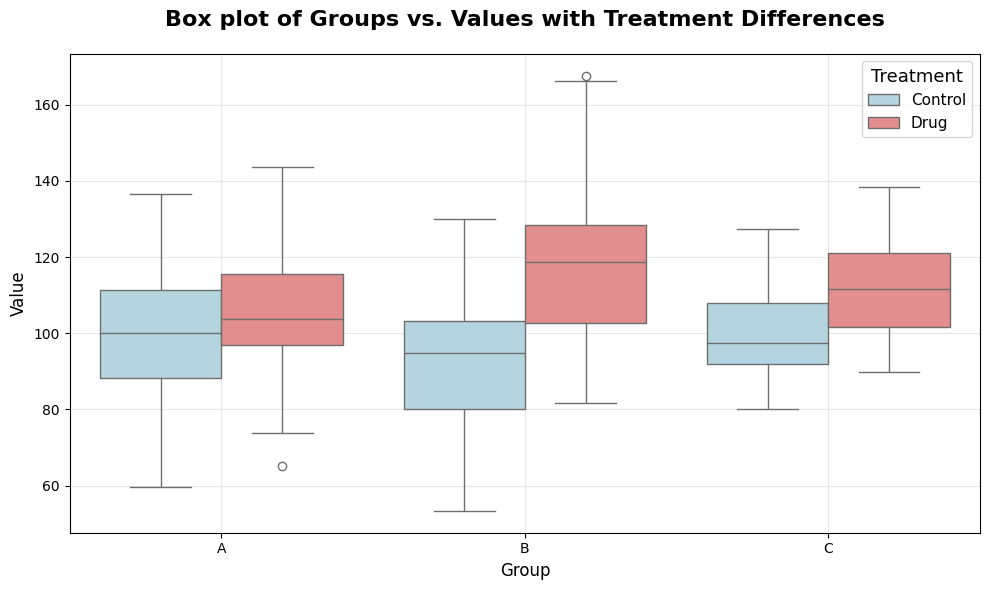

In [35]:
# Publication-ready plot - set the figure size
plt.figure(figsize=(10, 6))

# Create the plot with custom colors
palette=['lightblue', 'lightcoral']
ax = sns.boxplot(data=df, x='Group', y='Value', hue='Treatment', palette=palette)

# Customize appearance (title and apperance)
ax.set_title('Box plot of Groups vs. Values with Treatment Differences', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Group', fontsize=12)
ax.set_ylabel('Value', fontsize=12)

# Customize legend
ax.legend(title='Treatment', title_fontsize='13', fontsize='11', loc='upper right')

# Add grid and styling
ax.grid(alpha=0.3)
ax.set_facecolor('white')

plt.tight_layout()
plt.show()